In [ ]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

def energy (data, m):
    t = data["t"]
    k = []
    u = []
    e = []
    r12 = 0
    r23 = 0
    r13 = 0
    for i in range(len(t)):
        r12 = np.sqrt((data["x1"][i] - data["x2"][i]) ** 2 + (data["y1"][i] - data["y2"][i]) ** 2 + (data["z1"][i] - data["z2"][i]) ** 2)
        r23 = np.sqrt((data["x3"][i] - data["x2"][i]) ** 2 + (data["y3"][i] - data["y2"][i]) ** 2 + (data["z3"][i] - data["z2"][i]) ** 2)
        r13 = np.sqrt((data["x1"][i] - data["x3"][i]) ** 2 + (data["y1"][i] - data["y3"][i]) ** 2 + (data["z1"][i] - data["z3"][i]) ** 2)
    
        k1 = (1./2.) * m[0] * (data["vx1"][i] ** 2 + data["vy1"][i] ** 2 + data["vz1"][i] ** 2)
        k2 = (1./2.) * m[1] * (data["vx2"][i] ** 2 + data["vy2"][i] ** 2 + data["vz2"][i] ** 2)
        k3 = (1./2.) * m[2] * (data["vx3"][i] ** 2 + data["vy3"][i] ** 2 + data["vz3"][i] ** 2)
        k.append(k1 + k2 + k3)
    
        u1 = - G * m[0] * m[1] / r12 - G * m[0] * m[2] / r13
        u2 = - G * m[1] * m[0] / r12 - G * m[1] * m[2] / r23
        u3 = - G * m[2] * m[0] / r13 - G * m[2] * m[1] / r23
        u.append(u1 + u2 + u3)
        e.append(k[i] + (0.5) * u[i])
    return e

In [1]:
data4 = pd.read_csv("3Corpi_RK4.dat", delimiter="\t")
data2 = pd.read_csv("3Corpi_RK2.dat", delimiter="\t")
dataE = pd.read_csv("3Corpi_E.dat", delimiter="\t")

m = [0.3, 0.3, 0.3]
G = 1

plt.plot(dataE["t"], energy(dataE, m), label = r"$E_{E}$")
plt.plot(data2["t"], energy(data2, m), label = r"$E_{RK2}$")
plt.plot(data4["t"], energy(data4, m), label = r"$E_{RK4}$")

plt.legend()
plt.grid(True)
plt.xlabel("t")
plt.ylabel("E")
plt.savefig("E_1_bis.png")
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '3Corpi_RK4.dat'

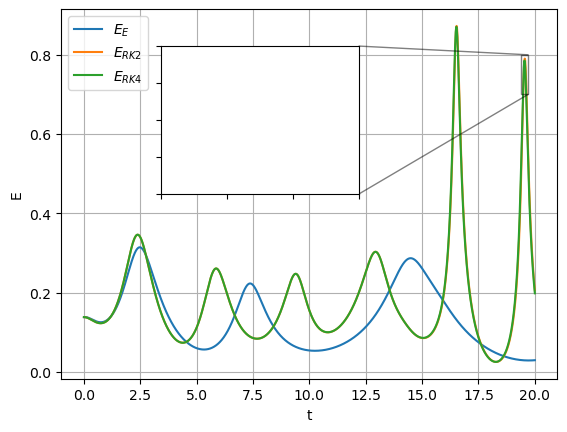

In [36]:
data4 = pd.read_csv("3Corpi_RK4_2.dat", delimiter="\t")
data2 = pd.read_csv("3Corpi_RK2_2.dat", delimiter="\t")
dataE = pd.read_csv("3Corpi_E_2.dat", delimiter="\t")

m = [0.3, 0.3, 0.3]
G = 1

# fig, ax = plt.subplots()

plt.plot(dataE["t"], energy(dataE, m), label = r"$E_{E}$")
plt.plot(data2["t"], energy(data2, m), label = r"$E_{RK2}$")
plt.plot(data4["t"], energy(data4, m), label = r"$E_{RK4}$")

# x1, x2, y1, y2 = 19.4, 19.7, 0.7, 0.8  # subregion of the original image
# axins = ax.inset_axes(
#     [0.2, 0.5, 0.4, 0.4],
#     xlim=(x1, x2), ylim=(y1, y2), xticklabels=[], yticklabels=[])
# axins.plot(tE, e_E, label = r"$E_{E}$")
# axins.plot(t2, e_2, label = r"$E_{RK2}$")
# axins.plot(t4, e_4, label = r"$E_{RK4}$")

# ax.indicate_inset_zoom(axins, edgecolor="black")

plt.legend()
plt.grid(True)
plt.xlabel("t")
plt.ylabel("E")
plt.savefig("E_2.png")
plt.show()
